# ON34 Python S07 Banco de dados I - Exercicio de casa

Esse documento tem como objetivo passar passo a passo de um exercício que deverá ser feito após de Bando de dados I.

## Caso pessoal

Pense no seu dia a dia, o que poderia se aproveitar de uma arquitetura de banco de dados para organizar as informações? (e as idéias).



## Desafio 1

Traga um caso de uso que identificou em seu dia a dia. Explique o motivo dos dados precisarem de organização e quais as informações que espera ter uma vez que esses forem organizados.

Resposta esperada: Um texto de no minimo 2 parágrafos com sua necessidade de negócio e ao menos 3 perguntas a serem respondidas pela organização dos dados.



**DESAFIO 1 RESPOSTA**

A loja "Rainha dos Acessórios", que oferece o serviço de vendas de bolsas, sapatos e cintos, quer implementar uma premiação para os clientes e funcionários no dia 17/07/2024. Essa é uma data especial para a empresa, é seu aniversário de 10 anos de funcionamento. Para tal premiação precisa de um banco de dados para organizar as informações de suas vendas.

A gerência quer saber qual funcionário vendeu mais e qual cliente comprou mais para entregar a premiação. Além de querer saber qual categoria de acessório vendeu mais, para poder acompanhar os itens favoritos de  seus clientes.

## Desafio 2

Estruture uma arquitetura de ao menos 3 entidades contando com chaves primárias e estrangeiras para solucionar o problema inicial.

Resposta esperada: Um desenho de tabelas e suas relações, indicação de qual modelo de estrutura escolheu.

**DESAFIO 2 RESPOSTA**


Modelo usado  Star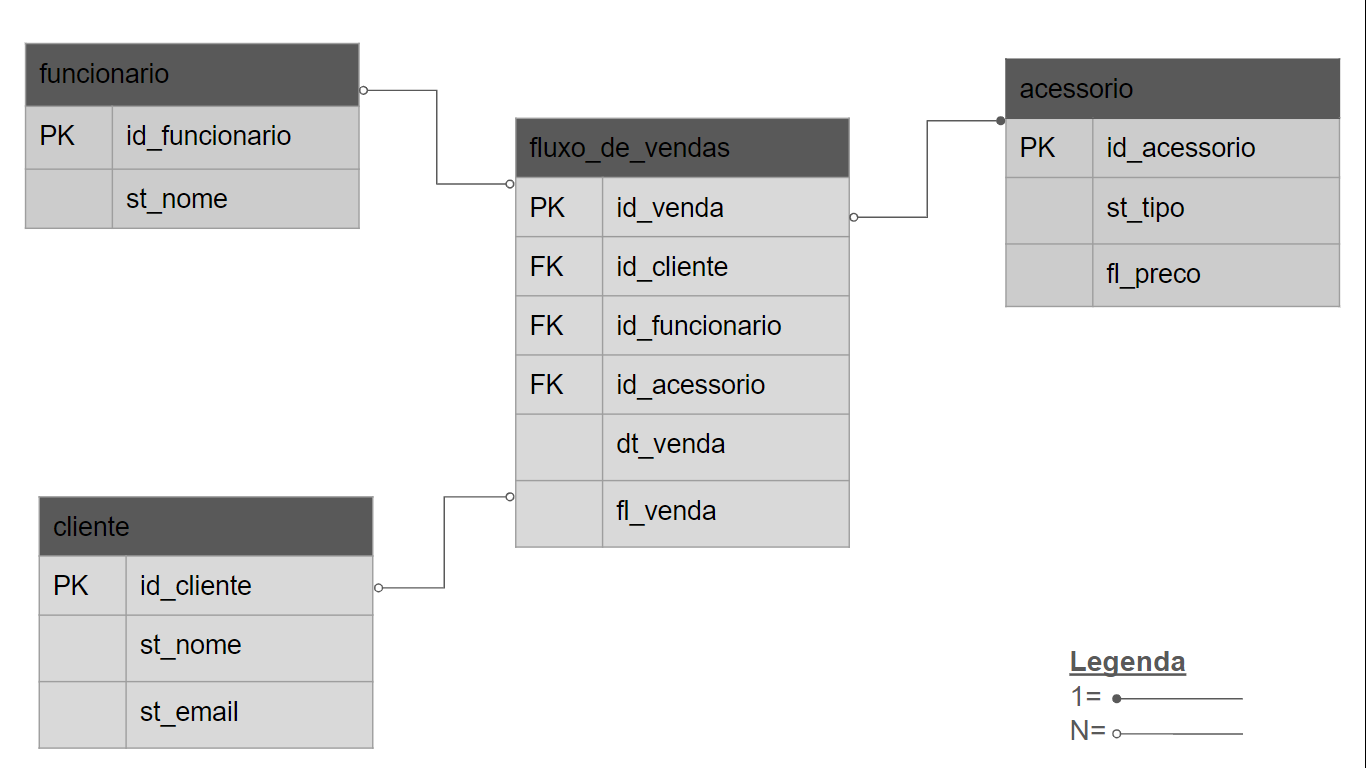

## Desafio 3

Crie toda a estrutura desenhada e popule as tabelas citadas.

Resposta esperada: Respostas de acordo com o desenho e o preenchimento feito.


In [ ]:
import sqlite3
conn = sqlite3.connect("rainha_dos_acessorios.db")
cur  = conn.cursor()

In [ ]:
cur.execute("""
CREATE TABLE acessorio(
  id_acessorio TEXT NOT NULL PRIMARY KEY,
  st_tipo TEXT NOT NULL,
  fl_preco REAL NOT NULL
)
""")

In [ ]:
cur.execute("""
CREATE TABLE cliente(
  id_cliente TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  st_email TEXT NOT NULL
)
""")

In [ ]:
cur.execute("""
CREATE TABLE funcionario(
  id_funcionario TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL
)
""")

In [ ]:
cur.execute("""
CREATE TABLE fluxo_de_vendas(
  id_venda TEXT NOT NULL PRIMARY KEY,
  id_acessorio TEXT NOT NULL,
  id_funcionario TEXT NOT NULL,
  id_cliente TEXT NOT NULL,
  dt_venda TEXT NOT NULL,
  fl_venda REAL NOT NULL,
  FOREIGN KEY (id_acessorio)
      REFERENCES acessorio (id_acessorio)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_funcionario)
      REFERENCES funcionario (id_funcionario)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_cliente)
      REFERENCES cliente (id_cliente)
         ON DELETE CASCADE
         ON UPDATE NO ACTION

)
""")

In [ ]:
cur.execute("""
INSERT INTO acessorio  VALUES
('a1', 'cinto', 25.00),
('a2', 'sapato', 90.00),
('a3', 'bolsa', 180.00),
('a4', 'cinto', 25.00),
('a5', 'cinto', 30.00),
('a6', 'bolsa', 280.00),
('a7', 'cinto', 25.00),
('a8', 'sapato', 120.00)
""")

In [ ]:
cur.execute("""
DROP TABLE acessorio
""")

DESAFIO 4 RESPOSTA


Uso do DROP porque tem vários id_acessorios e deveria ser somente 3

In [ ]:
cur.execute("""
CREATE TABLE acessorio(
  id_acessorio TEXT NOT NULL PRIMARY KEY,
  st_tipo TEXT NOT NULL,
  fl_preco REAL NOT NULL
)
""")

In [ ]:
cur.execute("""
INSERT INTO acessorio  VALUES
('a1', 'cinto', 25.00),
('a2', 'sapato', 90.00),
('a3', 'bolsa', 180.00)
""")

In [ ]:
conn.commit()

In [ ]:
cur.execute("""
INSERT INTO  funcionario  VALUES
("f1", 'Fernanda'),
("f2", 'Carlos'),
("f3", 'Luiza'),
("f4", 'Maria')
""")

In [ ]:
conn.commit()

In [ ]:

INSERT INTO cliente
VALUES
("c1", 'Liz Jácome', 'jacome.liz@email.com'),
("c2", 'Socorro Carvalho', 'carvalho.socorro@email.com'),
("c3", 'José Maria', 'jose.maria@email.com'),
("c4", 'João Sousa', 'joao.sousa@email.com'),
("c5", 'Alice Viana', 'viana.alice@email.com')
""")

DESAFIO 4 RESPOSTA

Uso do DROP COLUMN.

In [ ]:
cur.execute("""
ALTER TABLE cliente

DROP COLUMN st_email
""")

Tabela atualizada

In [ ]:
res = cur.execute("""
SELECT
	id_cliente,
	St_nome
FROM
	cliente
""")

res.fetchall()

[('c1', 'Liz Jácome'),
 ('c2', 'Socorro Carvalho'),
 ('c3', 'José Maria'),
 ('c4', 'João Sousa'),
 ('c5', 'Alice Viana')]

In [ ]:
conn.commit()

In [ ]:
cur.execute("""
INSERT INTO fluxo_de_vendas VALUES
(1, 'a1', 'f1', 'c1', '2024-07-17', 25.00),
(2, 'a1', 'f2', 'c2', '2024-07-17', 25.00),
(3, 'a3', 'f1', 'c5', '2024-07-17', 180.00),
(4, 'a2', 'f3', 'c3', '2024-07-17', 90.00),
(5, 'a2', 'f4', 'c4', '2024-07-17', 90.00),
(6, 'a1', 'f1', 'c1', '2024-07-17', 25.00),
(7, 'a1', 'f2', 'c2', '2024-07-17', 25.00),
(8, 'a3', 'f1', 'c5', '2024-07-17', 180.00),
(9, 'a2', 'f4', 'c3', '2024-07-17', 90.00),
(10, 'a2', 'f4', 'c4', '2024-07-17', 90.00)
""")

In [ ]:
conn.commit()

## Desafio 4

Se deixe errar e corrigir. Mostre ajustes que teve que fazer depois da estrutura completa.

Resposta esperada: Use o metodo UPDATE, DROP ou ALTER para modificar sua estrutura.


**DESAFIO 4 RESPOSTA**

Mudando a grafia do nome da funcionária 'Luiza' para 'Luisa'

In [ ]:
cur.execute("""
UPDATE funcionario
SET
    st_nome = 'Luisa'
WHERE
    id_funcionario = "f3"
    """)

Verificando mudança

In [ ]:
res = cur.execute("""
SELECT
	id_funcionario,
	St_nome
FROM
	funcionario
WHERE
	id_funcionario = "f3"
""")

res.fetchall()

[('f3', 'Luisa')]

## Desafio 5

Responda suas dúvidas de negócio com os dados que levantou.

Resposta esperada: Crie consultas para entender melhor seus dados, ao menos 3 consultas relacionadas as dúvidas iniciais.


**DESAFIO 5 RESPOSTA**

Cliente que mais comprou no dia 17/07/*2024*

In [ ]:
res = cur.execute("""
SELECT
  id_cliente,
  SUM(fl_venda)
FROM
  fluxo_de_vendas
GROUP BY
  id_cliente
""")
res.fetchall()

[('c1', 50.0), ('c2', 50.0), ('c3', 180.0), ('c4', 180.0), ('c5', 360.0)]

Quem é 'c5'?

In [ ]:
res = cur.execute("""
SELECT
  id_cliente,
  st_nome
FROM
  cliente
Group BY
  st_nome
ORDER BY
  id_cliente asc
""")
res.fetchall()

[('c1', 'Liz Jácome'),
 ('c2', 'Socorro Carvalho'),
 ('c3', 'José Maria'),
 ('c4', 'João Sousa'),
 ('c5', 'Alice Viana')]

Quem mais comprou foi a cliente Alice Viana.

**DESAFIO 5 RESPOSTA**

Qual acessório foi o mais vendido?

In [ ]:
res = cur.execute("""
SELECT
  id_acessorio,
  count(id_acessorio)
FROM
  fluxo_de_vendas
GROUP BY
  id_acessorio
ORDER BY
  id_acessorio asc
""")
res.fetchall()

[('a1', 4), ('a2', 4), ('a3', 2)]

Quem é 'a1' e 'a2'?

In [ ]:
res = cur.execute("""
SELECT
  id_acessorio,
  st_tipo
FROM
  acessorio
Group BY
  st_tipo
ORDER BY
  id_acessorio asc
""")
res.fetchall()

[('a1', 'cinto'), ('a2', 'sapato'), ('a3', 'bolsa')]

Houve um empate entre sapatos e cintos, cada um com 4 vendas. Bolsa só teve 2 vendas.

**DESAFIO 5 RESPOSTA**

Qual funcionário vendeu mais?

In [ ]:
res = cur.execute("""
SELECT
  id_funcionario,
  count(id_funcionario)
FROM
  fluxo_de_vendas
GROUP BY
  id_funcionario
ORDER BY
  id_funcionario asc
""")
res.fetchall()

[('f1', 4), ('f2', 2), ('f3', 1), ('f4', 3)]

Quem é 'f1'?

In [ ]:
res = cur.execute("""
SELECT
  id_funcionario,
  st_nome
FROM
  funcionario
Group BY
  st_nome
  ORDER BY
  id_funcionario asc
""")
res.fetchall()

[('f1', 'Fernanda'), ('f2', 'Carlos'), ('f3', 'Luisa'), ('f4', 'Maria')]

Fernanda fez o maior número de vendas


In [ ]:
res = cur.execute("""
SELECT
  id_funcionario,
  SUM(fl_venda)
FROM
  fluxo_de_vendas
GROUP BY
  id_funcionario
ORDER BY
  id_funcionario asc
""")
res.fetchall()

[('f1', 410.0), ('f2', 50.0), ('f3', 90.0), ('f4', 270.0)]

E foi a Fernanda também que somou o maior volume de vendas.

O total de vendas do dia de aniversário de Empresa foi:

In [ ]:
res = cur.execute("""
SELECT
  SUM(fl_venda)
FROM
  fluxo_de_vendas
""")
res.fetchall()

[(820.0,)]